# Causal programming

## Dependencies

In [21]:
(require '[acausal.core :refer [model identify p q data query]] ); :reload-all)
(require '[clojure.repl :refer [doc]])

## Model

Let $X$ be smoking, $Y$ be cancer, and $Z$ be tar on lungs.

Assume that the effect of smoking on caner is mediated by tar. However, there may be a latent factor that affects both smoking and cancer. These assumptions can be summarized in the following model:

$$ X = f_X(\epsilon_X) $$
$$ Z = f_Z(x, \epsilon_Z) $$
$$ Y = f_Y(z, \epsilon_Y) $$
$$ \epsilon_X \not\bot\!\!\bot \epsilon_Y$$

In [13]:
(def m
    (model
        {:x []
         :z [:x]
         :y [:z]}
        #{:x :y}))

#'user/m

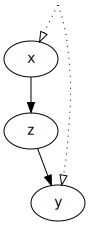

In [51]:
m

In [52]:
(println m)

(println (-> m :pa :z))

#acausal.core.Model{:pa {:x #{}, :z #{:x}, :y #{:z}}, :bi #{#{:y :x}}}
#{:x}


In [18]:
(def complex-model
    "Made up names"
    (model
        {:elastin [:selectin]
         :collagen [:cadherin :nicotinic]
         :cadherin [:selectin :elastin]
         :selectin []
         :nicotinic [:selectin]}
        #{:selectin :elastin}
        #{:collagen :selectin}
        #{:elastin :nicotinic}
        #{:collagen :elastin}))

#'user/complex-model

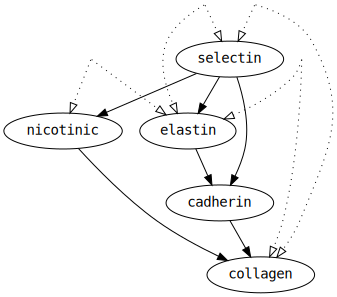

In [19]:
complex-model

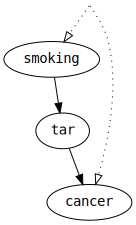

In [20]:
(def smoking-model
    "Smoking model from (Pearl 1995)"
    (model
        {:smoking []
         :tar [:smoking]
         :cancer [:tar]}
        #{:smoking :cancer}))

smoking-model

## Query

A query is (usually) a causal effect computation that we are interested in, e.g. $P(y \mid do(x))$

In [57]:
(q [:y] :do [:x])

#acausal.core.Query{:effect #{:y}, :do #{:x}}

## Data

Data is the set of known population probabilities, e.g. $P(v)$.

In [10]:
(data [:x :y :z])

#acausal.core.Data{:vars #{:y :z :x}, :surrogate #{}, :i-map nil}

## Identification

Calculate the query, with respect to the model assumptions, from the available data.

In [15]:
(identify
    m
    (q [:y] :do [:x])
    (data [:x :y :z]))

{:sub #{:z},
 :sum
 {:prod
  #{{:where {:sub #{:y}, :sum {:p #{:y :z :x}}},
     :p #{:z},
     :given #{:x}}
    {:p #{:y},
     :where
     {:sub #{:x},
      :sum {:p #{:y :x}, :where {:p #{:y}, :given #{:z :x}}}}}}}}


In [25]:
(identify
    smoking-model
    (q [:cancer] :do [:smoking]))

{:sub #{:tar},
 :sum
 {:prod
  #{{:p #{:cancer},
     :where
     {:sub #{:smoking},
      :sum
      {:p #{:cancer :smoking},
       :where {:p #{:cancer}, :given #{:tar :smoking}}}}}
    {:where {:sub #{:cancer}, :sum {:p #{:tar :cancer :smoking}}},
     :p #{:tar},
     :given #{:smoking}}}}}


In [24]:
(doc smoking-model)

-------------------------
user/smoking-model
  Smoking model from (Pearl 1995)
